In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [5]:
df_ = pd.read_csv('/Users/sedeftaskin/Desktop/Data_Science/VBO/Homeworks/WEEK6/DIABETES/diabetes.csv')
df = df_.copy()

In [6]:
def check_df(dataframe, head=5, tail=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(tail))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)

In [7]:
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1

In [15]:
cols_with_zero = ["Glucose", "BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.NaN)

In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    #1
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    #2
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    #3
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    # Categorical Variables
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Numerical Variables
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Summary
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # Listing Variables w.r.t Type
    return cat_cols, num_cols, cat_but_car

In [16]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [9]:
cat_cols

['Outcome']

In [22]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [23]:
for col in cat_cols:
    cat_summary(df, col)

   Outcome      Ratio
0      500  65.104167
1      268  34.895833
##########################################


In [24]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: Pregnancies, dtype: float64


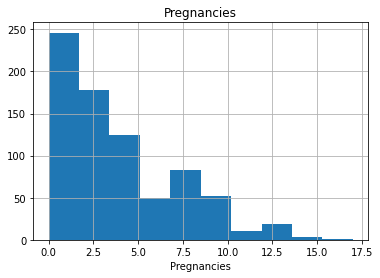

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
5%        80.000000
10%       86.200000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      135.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: Glucose, dtype: float64


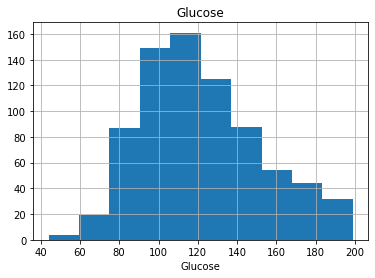

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
5%        52.000000
10%       58.000000
20%       62.000000
30%       66.000000
40%       70.000000
50%       72.000000
60%       75.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       92.000000
99%      106.000000
max      122.000000
Name: BloodPressure, dtype: float64


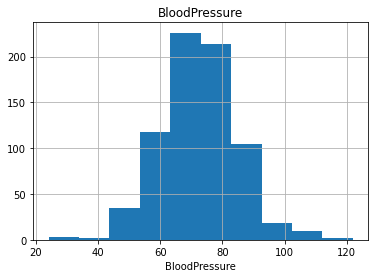

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
5%        13.000000
10%       16.000000
20%       19.000000
30%       23.000000
40%       27.000000
50%       29.000000
60%       32.000000
70%       34.000000
80%       38.000000
90%       42.000000
95%       46.000000
99%       53.200000
max       99.000000
Name: SkinThickness, dtype: float64


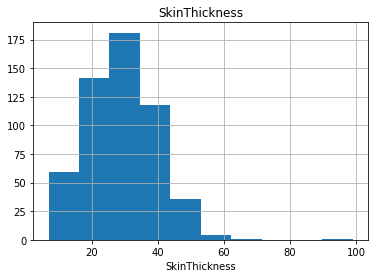

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
5%        41.650000
10%       50.300000
20%       69.200000
30%       87.900000
40%      105.000000
50%      125.000000
60%      145.800000
70%      176.000000
80%      210.000000
90%      292.400000
95%      395.500000
99%      580.470000
max      846.000000
Name: Insulin, dtype: float64


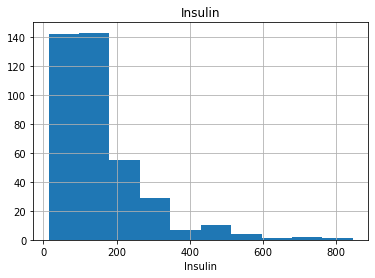

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
5%        22.200000
10%       24.000000
20%       26.200000
30%       28.400000
40%       30.340000
50%       32.300000
60%       33.800000
70%       35.500000
80%       37.880000
90%       41.620000
95%       44.500000
99%       51.012000
max       67.100000
Name: BMI, dtype: float64


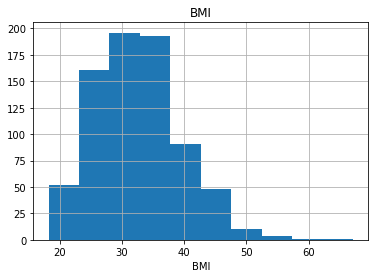

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


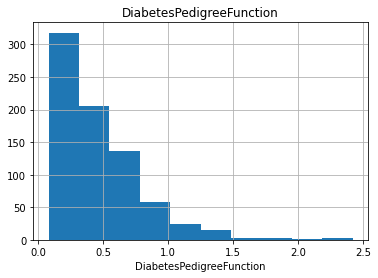

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
max       81.000000
Name: Age, dtype: float64


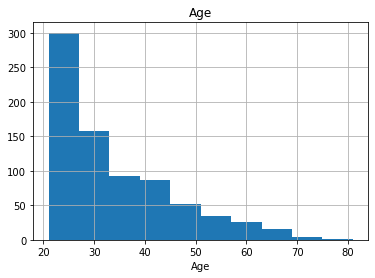

In [25]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [26]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [27]:
for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        110.643863
1        142.319549


         BloodPressure
Outcome               
0            70.877339
1            75.321429


         SkinThickness
Outcome               
0            27.235457
1            33.000000


            Insulin
Outcome            
0        130.287879
1        206.846154


               BMI
Outcome           
0        30.859674
1        35.406767


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164




In [28]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

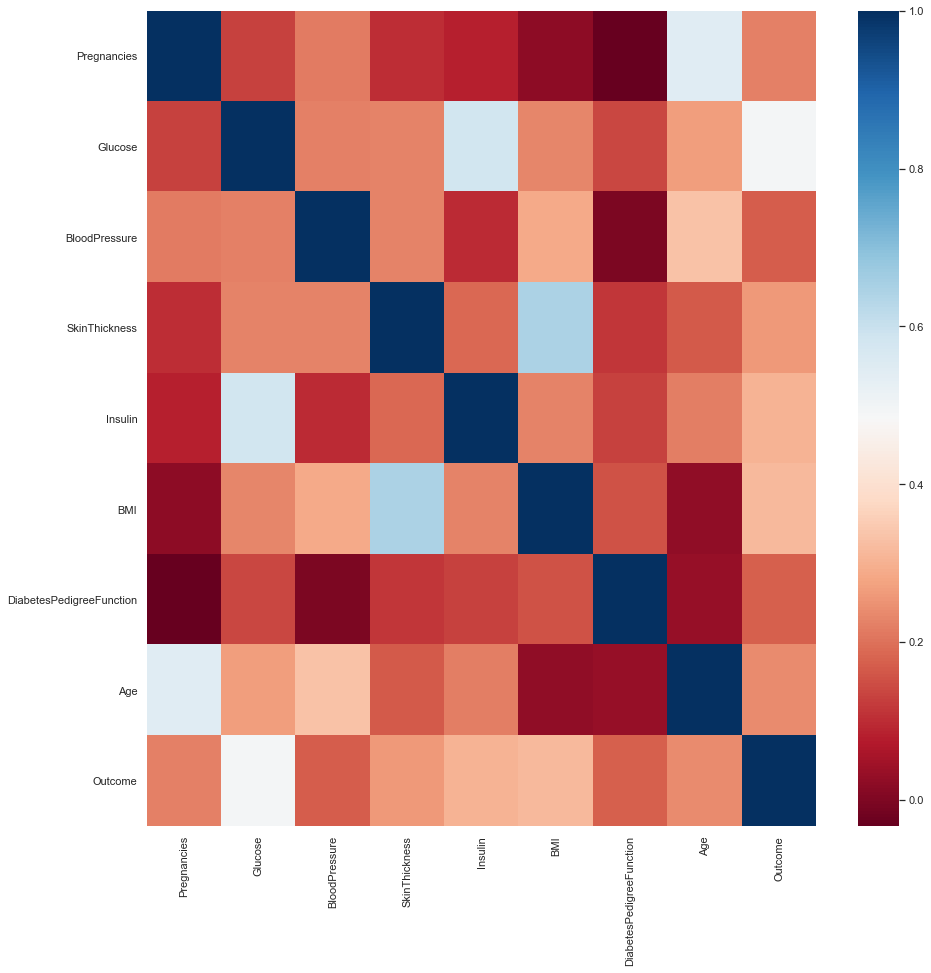

In [29]:
drop_list = high_correlated_cols(df, plot=True, corr_th=0.70)

In [30]:
drop_list

[]

In [31]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### Outliers

In [40]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [41]:
for col in num_cols:
    print(col, ":", outlier_thresholds(df, col))

Pregnancies : (-15.0, 25.0)
Glucose : (-71.5, 332.5)
BloodPressure : (-8.0, 152.0)
SkinThickness : (-36.5, 95.5)
Insulin : (-489.12499999999955, 926.2749999999992)
BMI : (-11.250000000000004, 77.95)
DiabetesPedigreeFunction : (-1.3483999999999996, 2.621599999999999)
Age : (-34.5, 113.5)


In [42]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


In [44]:
for col in num_cols:
    print(col, ':', check_outlier(df, col))

Pregnancies : False
Glucose : False
BloodPressure : False
SkinThickness : True
Insulin : False
BMI : False
DiabetesPedigreeFunction : False
Age : False


In [37]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        print("Number of Outliers in", col_name, ":", len(outlier_index))
        return outlier_index

In [43]:
for col in num_cols:
    print('##################', col, 'Outliers', '###################')
    grab_outliers(df, col, index=True)

################## Pregnancies Outliers ###################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Number of Outliers in Pregnancies : 0
################## Glucose Outliers ###################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Number of Outliers in Glucose : 0
################## BloodPressure Outliers ###################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Number of Outliers in BloodPressure : 0
################## SkinThickness Outliers ###################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
579            2    197.0           70.0           99.0      NaN  34.7                     0.575   62        1


In [45]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [46]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [47]:
for col in num_cols:
    print(col, ':', check_outlier(df, col))

Pregnancies : False
Glucose : False
BloodPressure : False
SkinThickness : False
Insulin : False
BMI : False
DiabetesPedigreeFunction : False
Age : False


### Missing Values

In [48]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [49]:
na_columns = missing_values_table(df, na_name=True)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


In [50]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [51]:
missing_vs_target(df, "Outcome", na_columns)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                   0.329949    394
1                   0.368984    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.351387    757
1               0.181818     11




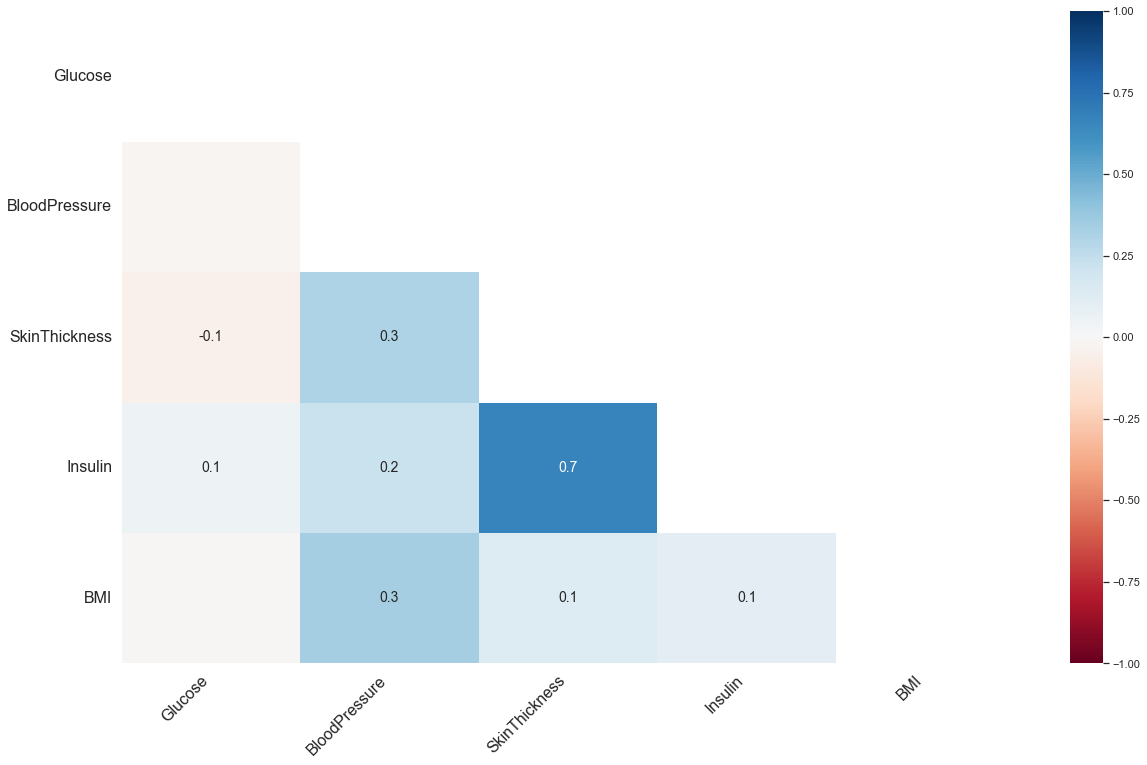

In [72]:

import missingno as msno
msno.heatmap(df)
plt.show()

In [77]:
# df["SkinThickness_NA_FLAG"] = df["SkinThickness"].notnull().astype('int')
# df["Insulin_NA_FLAG"] = df["Insulin"].notnull().astype('int')

In [78]:
#from statsmodels.stats.proportion import proportions_ztest

#test_stat, pvalue = proportions_ztest(count=[df.loc[df["Insulin_NA_FLAG"] == 1, "Outcome"].sum(), df.loc[df["Insulin_NA_FLAG"] == 0, "Outcome"].sum()],
#nobs=[df.loc[df["Insulin_NA_FLAG"] == 1, "Outcome"].shape[0], df.loc[df["Insulin_NA_FLAG"] == 0, "Outcome"].shape[0]])

#print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -1.1344, p-value = 0.2566


In [74]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [79]:
check_df(df)

##################### Shape #####################
(768, 11)
##################### Types #####################
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
SkinThickness_NA_FLAG         int64
Insulin_NA_FLAG               int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome  SkinThickness_NA_FLAG  Insulin_NA_FLAG
0          6.0    148.0           72.0           35.0      NaN  33.6                     0.627  50.0        1                      1                0
1          1.0     85.0           66.0           29.0      NaN  26.6                     0.351  31.0        0                      

In [80]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_NA_FLAG,Insulin_NA_FLAG
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1,1,0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0,1,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,1,1
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,1,1


In [52]:
df["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [64]:
df["Age_Cat"] = pd.cut(df["Age"], bins=[20,25, 30,35, 40, 50, df["Age"].max()], labels=["Youth","Adult1","Adult2","Mature1","Mature2" , "Old"])

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Cat
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1,Mature2
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0,Adult2
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1,Adult2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Youth1
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,Adult2


In [63]:
df.groupby("Age_Cat").agg({"Outcome": ["count", "mean"], "BloodPressure": "mean"})

Outcome           BloodPressure
          count      mean          mean
Age_Cat                                
Youth1      267  0.168539     67.078740
Adult1      150  0.300000     72.354610
Adult2       81  0.506173     72.389610
Mature1      76  0.460526     75.819444
Mature2     113  0.566372     77.532110
Old          81  0.469136     79.362500

In [65]:
df.loc[(df["BloodPressure"].isnull()) & (df["Age_Cat"] == "Youth"), "BloodPressure"] = 67.078740

In [66]:
df.loc[(df["BloodPressure"].isnull()) & (df["Age_Cat"] == "Adult1"), "BloodPressure"] =  72.354610
df.loc[(df["BloodPressure"].isnull()) & (df["Age_Cat"] == "Adult2"), "BloodPressure"] = 72.389610
df.loc[(df["BloodPressure"].isnull()) & (df["Age_Cat"] == "Mature1"), "BloodPressure"] = 75.819444
df.loc[(df["BloodPressure"].isnull()) & (df["Age_Cat"] == "Mature2"), "BloodPressure"] = 77.532110
df.loc[(df["BloodPressure"].isnull()) & (df["Age_Cat"] == "Old"), "BloodPressure"] = 79.362500

In [67]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Age_Cat                       0
dtype: int64

In [118]:
df["BMI"].describe()

count    757.000000
mean      32.394716
std        6.715793
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       50.250000
Name: BMI, dtype: float64

In [68]:
df["BMI_Cat"] = pd.cut(df["BMI"], bins=[18, 24.9, 29.9, 34.9, 39, 49, 59], labels=["Normal", "Overweighted", "1.Obesity", "2.Obesity", "3.Obesity", "Super_Obesity"])

In [69]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Cat,BMI_Cat
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1,Mature2,1.Obesity
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0,Adult2,Overweighted
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1,Adult2,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Youth,Overweighted
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,Adult2,3.Obesity


## Encoding

In [75]:
cat_cols, num_but_cat, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 11
cat_cols: 3
num_cols: 8
cat_but_car: 0
num_but_cat: 3


In [77]:
cat_cols=[col for col in cat_cols if col != "Outcome"]

In [128]:
# dff = one_hot_encoder(df, cat_cols, drop_first=True)

In [129]:
# dff.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_1,SkinThickness_NA_FLAG_1,Insulin_NA_FLAG_1,Age_Cat_Adult,Age_Cat_Mature,Age_Cat_Old,BMI_Cat_Overweighted,BMI_Cat_1.Obesity,BMI_Cat_2.Obesity,BMI_Cat_3.Obesity,BMI_Cat_Super_Obesity
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1,1,0,0,1,0,0,1,0,0,0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0,1,0,1,0,0,1,0,0,0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1,0,0,1,0,0,0,0,0,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,1,1,0,0,0,1,0,0,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,1,1,1,0,0,0,0,0,1,0


In [78]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [79]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [80]:
for col in cat_cols:
    df_sedef = label_encoder(df, col)

In [81]:
df_sedef.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Cat,BMI_Cat
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1,3,0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0,1,4
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1,1,3
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,5,4
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,1,2


## Standart Scaling

In [82]:
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [83]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [92]:
scaler = MinMaxScaler()
df_sedef = pd.DataFrame(scaler.fit_transform(df_sedef), columns=df_sedef.columns)

In [93]:
df_sedef.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Cat,BMI_Cat
0,0.352941,0.670968,0.489796,0.316384,0.323558,0.314928,0.234415,0.483333,1.0,0.6,0.000000
1,0.058824,0.264516,0.428571,0.248588,0.075240,0.171779,0.116567,0.166667,0.0,0.2,0.666667
2,0.470588,0.896774,0.408163,0.133333,0.190144,0.104294,0.253629,0.183333,1.0,0.2,0.500000
3,0.058824,0.290323,0.428571,0.180791,0.096154,0.202454,0.038002,0.000000,0.0,1.0,0.666667
4,0.000000,0.600000,0.163265,0.316384,0.185096,0.509202,0.943638,0.200000,1.0,0.2,0.333333


In [95]:

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_sedef = pd.DataFrame(imputer.fit_transform(df_sedef), columns=df_sedef.columns)
df_sedef.head()
df_sedef = pd.DataFrame(scaler.inverse_transform(df_sedef), columns=df_sedef.columns)
df_sedef.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_Cat                     0
BMI_Cat                     0
dtype: int64

## Model

In [96]:
df_sedef.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Cat,BMI_Cat
0,0.352941,0.670968,0.489796,0.316384,0.323558,0.314928,0.234415,0.483333,1.0,0.6,0.000000
1,0.058824,0.264516,0.428571,0.248588,0.075240,0.171779,0.116567,0.166667,0.0,0.2,0.666667
2,0.470588,0.896774,0.408163,0.133333,0.190144,0.104294,0.253629,0.183333,1.0,0.2,0.500000
3,0.058824,0.290323,0.428571,0.180791,0.096154,0.202454,0.038002,0.000000,0.0,1.0,0.666667
4,0.000000,0.600000,0.163265,0.316384,0.185096,0.509202,0.943638,0.200000,1.0,0.2,0.333333


In [98]:
y = df_sedef["Outcome"]
X = df_sedef.drop("Outcome", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7835497835497836